# Support Vector Machines and KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.model_selection import validation_curve,KFold,cross_val_score,GridSearchCV, train_test_split

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
#use the cleaned data from the main notebook
X=pd.read_csv('X_train.csv',  index_col=0)
y=pd.read_csv('y_train.csv', header=-1, index_col=0)

X=X.reset_index()
y=y.reset_index()

X.drop(X.columns[[0]],axis=1, inplace=True)
y.drop(y.columns[[0]],axis=1, inplace=True)

In [3]:
# Splitting the data into train(80%) and test(20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state = 99)

In [4]:
#Scale the data on the test and train dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.fit_transform(X_test)

In [25]:
#function to print out the meterics received
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')###k fold cross validation
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        print('\n-----------------------------------------------------\n')
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))  

# Tuning SVM model

In [6]:
#Create a svm Classifier with Linear Kernel
svm = svm.SVC(kernel='linear')

#Train the model using the training sets
svm.fit(X_train_sc, y_train)

#Predict the response for test dataset
y_pred_svm = svm.predict(X_test_sc)

svm_score=cross_val_score(svm, X_train_sc, y_train, cv=10)
actual=np.array(y_test)

In [40]:
# specify params
params = {"C": [0.0001, 0.001, 0.1, 1, 10, 100,1000,10000,100000],"gamma" :[0.00001,0.0001, 0.001, 0.1, 1, 10,100]}
folds = KFold(n_splits = 3, shuffle = True, random_state = 99)


# specify scores/metrics in an iterable
scores = ['accuracy', 'precision', 'recall']

for score in scores:
    
    # set up GridSearch for score metric
    svm = GridSearchCV(SVC(), 
                       params, 
                       cv=folds,
                       scoring=score,
                       return_train_score=True)
    # fit
    svm.fit(X_train_sc, y_train)

    print(" The highest {0} score is {1} at C = {2}".format(score, svm.best_score_, svm.best_params_))
    print("\n")

 The highest accuracy score is 0.8305785123966942 at C = {'C': 1000, 'gamma': 0.0001}


 The highest precision score is 0.8037177548070092 at C = {'C': 1, 'gamma': 0.1}


 The highest recall score is 0.9374456712119049 at C = {'C': 1, 'gamma': 0.001}




In [41]:
# results of grid search CV
cv_results = pd.DataFrame(svm.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.001669,0.000077,0.000964,3.242726e-05,0.0001,1e-05,"{'C': 0.0001, 'gamma': 1e-05}",1.000000,1.000000,0.000000,0.669421,0.470421,41,1.000000,1.000000,0.000000,0.666667,0.471405
1,0.001593,0.000059,0.000934,1.203010e-05,0.0001,0.0001,"{'C': 0.0001, 'gamma': 0.0001}",1.000000,1.000000,0.000000,0.669421,0.470421,41,1.000000,1.000000,0.000000,0.666667,0.471405
2,0.001628,0.000135,0.000931,1.738658e-05,0.0001,0.001,"{'C': 0.0001, 'gamma': 0.001}",1.000000,1.000000,0.000000,0.669421,0.470421,41,1.000000,1.000000,0.000000,0.666667,0.471405
3,0.001560,0.000044,0.000930,1.333582e-05,0.0001,0.1,"{'C': 0.0001, 'gamma': 0.1}",1.000000,1.000000,0.000000,0.669421,0.470421,41,1.000000,1.000000,0.000000,0.666667,0.471405
4,0.001558,0.000040,0.000923,1.404985e-05,0.0001,1,"{'C': 0.0001, 'gamma': 1}",1.000000,1.000000,0.000000,0.669421,0.470421,41,1.000000,1.000000,0.000000,0.666667,0.471405
5,0.001594,0.000027,0.000932,1.782071e-05,0.0001,10,"{'C': 0.0001, 'gamma': 10}",1.000000,1.000000,0.000000,0.669421,0.470421,41,1.000000,1.000000,0.000000,0.666667,0.471405
6,0.001367,0.000113,0.000836,1.479647e-05,0.0001,100,"{'C': 0.0001, 'gamma': 100}",1.000000,1.000000,0.000000,0.669421,0.470421,41,1.000000,1.000000,0.000000,0.666667,0.471405
7,0.001565,0.000049,0.000952,3.569968e-05,0.001,1e-05,"{'C': 0.001, 'gamma': 1e-05}",1.000000,1.000000,0.000000,0.669421,0.470421,41,1.000000,1.000000,0.000000,0.666667,0.471405
8,0.001561,0.000049,0.000928,1.182998e-05,0.001,0.0001,"{'C': 0.001, 'gamma': 0.0001}",1.000000,1.000000,0.000000,0.669421,0.470421,41,1.000000,1.000000,0.000000,0.666667,0.471405
9,0.001548,0.000026,0.000927,8.591895e-06,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",1.000000,1.000000,0.000000,0.669421,0.470421,41,1.000000,1.000000,0.000000,0.666667,0.471405


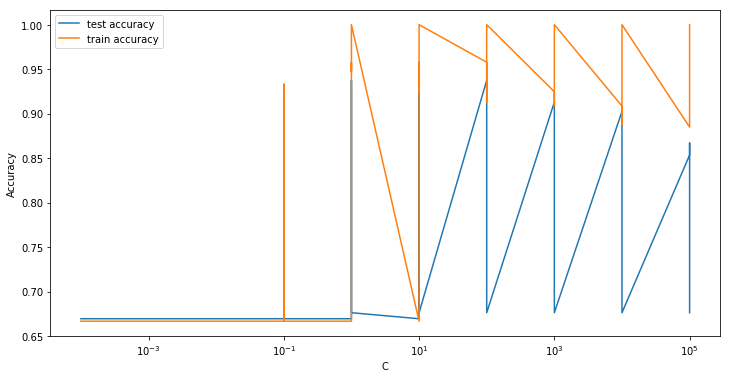

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [43]:
#find the score with the best C value
best_score = svm.best_score_
best_C = svm.best_params_['C']
best_gam = svm.best_params_['gamma']

print(" The highest test accuracy is {0} at C = {1} and gamma = {2} ".format(best_score, best_C, best_gam))

 The highest test accuracy is 0.9374456712119049 at C = 1 and gamma = 0.001 


In [44]:
# accuracy
print_score(svm, X_train_sc, y_train, X_test, y_test, train=True)
print_score(svm, X_train_sc, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.8017

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.64      0.76       115
           1       0.75      0.94      0.83       127

   micro avg       0.80      0.80      0.80       242
   macro avg       0.83      0.79      0.79       242
weighted avg       0.83      0.80      0.80       242


Confusion Matrix: 
 [[ 74  41]
 [  7 120]]

Average Accuracy: 	 0.7044
Accuracy SD: 		 0.1388

-----------------------------------------------------

Test Result:

accuracy score: 0.6230

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.62      1.00      0.77        38

   micro avg       0.62      0.62      0.62        61
   macro avg       0.31      0.50      0.38        61
weighted avg       0.39      0.62      0.48        61


Confusion Matrix: 
 [[ 0 23]
 [ 0 38]]



#### kernel set to 'rbf'

In [45]:
# Fitting Kernel SVM to the Training set
svm_rbf = SVC(kernel = 'rbf', random_state = 0)
svm_rbf.fit(X_train_sc, y_train)

# Predicting the Test set results
y_pred_svm_rbf = svm_rbf.predict(X_test_sc)

svm_rbf_score=cross_val_score(svm_rbf, X_train_sc, y_train, cv=10)
actual=np.array(y_test)

In [46]:
# specify params
params = {"C": [0.0001, 0.001, 0.1, 1, 10, 100,1000,10000,100000],
          "gamma" :[0.00001,0.0001, 0.001, 0.1, 1, 10,100]}
folds = KFold(n_splits = 3, shuffle = True, random_state = 4)

# specify scores/metrics in an iterable
scores = ['accuracy', 'precision', 'recall']

for score in scores:
    
    # set up GridSearch for score metric
    svm_rbf = GridSearchCV(SVC(), 
                       params, 
                       cv=folds,
                       scoring=score,
                       return_train_score=True)
    # fit
    svm_rbf.fit(X_train_sc, y_train)

    print(" The highest {0} score is {1} at C = {2}".format(score, svm_rbf.best_score_, svm_rbf.best_params_))
    print("\n")
    

 The highest accuracy score is 0.8347107438016529 at C = {'C': 1, 'gamma': 0.1}


 The highest precision score is 0.8233075189273538 at C = {'C': 1, 'gamma': 0.1}


 The highest recall score is 0.9632992605480643 at C = {'C': 10, 'gamma': 0.0001}




In [47]:
# results of grid search CV
cv_results = pd.DataFrame(svm.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.001669,0.000077,0.000964,3.242726e-05,0.0001,1e-05,"{'C': 0.0001, 'gamma': 1e-05}",1.000000,1.000000,0.000000,0.669421,0.470421,41,1.000000,1.000000,0.000000,0.666667,0.471405
1,0.001593,0.000059,0.000934,1.203010e-05,0.0001,0.0001,"{'C': 0.0001, 'gamma': 0.0001}",1.000000,1.000000,0.000000,0.669421,0.470421,41,1.000000,1.000000,0.000000,0.666667,0.471405
2,0.001628,0.000135,0.000931,1.738658e-05,0.0001,0.001,"{'C': 0.0001, 'gamma': 0.001}",1.000000,1.000000,0.000000,0.669421,0.470421,41,1.000000,1.000000,0.000000,0.666667,0.471405
3,0.001560,0.000044,0.000930,1.333582e-05,0.0001,0.1,"{'C': 0.0001, 'gamma': 0.1}",1.000000,1.000000,0.000000,0.669421,0.470421,41,1.000000,1.000000,0.000000,0.666667,0.471405
4,0.001558,0.000040,0.000923,1.404985e-05,0.0001,1,"{'C': 0.0001, 'gamma': 1}",1.000000,1.000000,0.000000,0.669421,0.470421,41,1.000000,1.000000,0.000000,0.666667,0.471405
5,0.001594,0.000027,0.000932,1.782071e-05,0.0001,10,"{'C': 0.0001, 'gamma': 10}",1.000000,1.000000,0.000000,0.669421,0.470421,41,1.000000,1.000000,0.000000,0.666667,0.471405
6,0.001367,0.000113,0.000836,1.479647e-05,0.0001,100,"{'C': 0.0001, 'gamma': 100}",1.000000,1.000000,0.000000,0.669421,0.470421,41,1.000000,1.000000,0.000000,0.666667,0.471405
7,0.001565,0.000049,0.000952,3.569968e-05,0.001,1e-05,"{'C': 0.001, 'gamma': 1e-05}",1.000000,1.000000,0.000000,0.669421,0.470421,41,1.000000,1.000000,0.000000,0.666667,0.471405
8,0.001561,0.000049,0.000928,1.182998e-05,0.001,0.0001,"{'C': 0.001, 'gamma': 0.0001}",1.000000,1.000000,0.000000,0.669421,0.470421,41,1.000000,1.000000,0.000000,0.666667,0.471405
9,0.001548,0.000026,0.000927,8.591895e-06,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",1.000000,1.000000,0.000000,0.669421,0.470421,41,1.000000,1.000000,0.000000,0.666667,0.471405


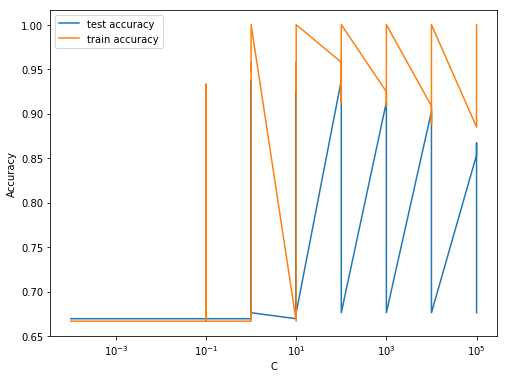

In [48]:
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [51]:
#find the score with the best C value
best_score = svm.best_score_
best_C = svm.best_params_['C']
best_gam = svm.best_params_['gamma']

print(" The highest test accuracy is {0} at C = {1} and gamma = {2}".format(best_score, best_C,best_gam))

 The highest test accuracy is 0.9374456712119049 at C = 1 and gamma = 0.001


In [50]:
# accuracy
print_score(svm_rbf, X_train_sc, y_train, X_test, y_test, train=True)
print_score(svm_rbf, X_train_sc, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.8017

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.64      0.76       115
           1       0.75      0.94      0.83       127

   micro avg       0.80      0.80      0.80       242
   macro avg       0.83      0.79      0.79       242
weighted avg       0.83      0.80      0.80       242


Confusion Matrix: 
 [[ 74  41]
 [  7 120]]

Average Accuracy: 	 0.5529
Accuracy SD: 		 0.0828

-----------------------------------------------------

Test Result:

accuracy score: 0.6230

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.62      1.00      0.77        38

   micro avg       0.62      0.62      0.62        61
   macro avg       0.31      0.50      0.38        61
weighted avg       0.39      0.62      0.48        61


Confusion Matrix: 
 [[ 0 23]
 [ 0 38]]



####  I will use kernel = 'rbf' in the comparison model data

-------

# Tuning KNN model

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import statsmodels.api as sm


In [7]:
X=pd.read_csv('X_train.csv',  index_col=0)
y=pd.read_csv('y_train.csv', header=-1, index_col=0)

X=X.reset_index()
y=y.reset_index()

X.drop(X.columns[[0]],axis=1, inplace=True)
y.drop(y.columns[[0]],axis=1, inplace=True)

In [8]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state = 99)

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.fit_transform(X_test)

In [14]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

for num in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=num)

    knn.fit(X_train_sc,y_train)
    y_pred_knn = knn.predict(X_test)
    knn_score = cross_val_score(knn, X, y, cv=10)
    w=metrics.accuracy_score(y_pred_knn,y_test)
    print(num,max(knn_score))
print_score(knn, X_train_sc, y_train, X_test, y_test, train=True)
print_score(knn, X_train_sc, y_train, X_test, y_test, train=False)


1 0.7419354838709677
2 0.7
3 0.7241379310344828
4 0.7333333333333333
5 0.8333333333333334
6 0.7666666666666667
7 0.7931034482758621
8 0.7666666666666667
9 0.7666666666666667
10 0.8064516129032258
11 0.8
12 0.8333333333333334
13 0.8064516129032258
14 0.8387096774193549
15 0.8387096774193549
16 0.8387096774193549
17 0.8064516129032258
18 0.8709677419354839
19 0.7741935483870968
20 0.7666666666666667
21 0.8
22 0.8387096774193549
23 0.8387096774193549
24 0.8709677419354839
25 0.8387096774193549
26 0.8064516129032258
27 0.8064516129032258
28 0.8387096774193549
29 0.8064516129032258
30 0.8064516129032258
31 0.7741935483870968
32 0.8064516129032258
33 0.8064516129032258
34 0.8333333333333334
35 0.8
36 0.8
37 0.7741935483870968
38 0.8064516129032258
39 0.7741935483870968
40 0.7666666666666667
41 0.7741935483870968
42 0.8064516129032258
43 0.8064516129032258
44 0.7741935483870968
45 0.8064516129032258
46 0.8064516129032258
47 0.7419354838709677
48 0.7741935483870968
49 0.8064516129032258
50 0.8

In [16]:
#Adding the best n_neighbors value of 18
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=18)

knn.fit(X_train_sc,y_train)
y_pred_knn = knn.predict(X_test)
knn_score = cross_val_score(knn, X, y, cv=10)
    
print_score(knn, X_train_sc, y_train, X_test, y_test, train=True)
print_score(knn, X_train_sc, y_train, X_test, y_test, train=False)

59
Train Result:

accuracy score: 0.8223

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.76      0.80       115
           1       0.80      0.88      0.84       127

   micro avg       0.82      0.82      0.82       242
   macro avg       0.83      0.82      0.82       242
weighted avg       0.83      0.82      0.82       242


Confusion Matrix: 
 [[ 87  28]
 [ 15 112]]

Average Accuracy: 	 0.8034
Accuracy SD: 		 0.0946

-----------------------------------------------------

59
Test Result:

accuracy score: 0.6230

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.78      0.61        23
           1       0.80      0.53      0.63        38

   micro avg       0.62      0.62      0.62        61
   macro avg       0.65      0.65      0.62        61
weighted avg       0.69      0.62      0.63        61


Confusion Matrix: 
 [[18  5]
 [18 20]]

